In [1]:
import kagglehub
kaushil268_disease_prediction_using_machine_learning_path = kagglehub.dataset_download('kaushil268/disease-prediction-using-machine-learning')

print('Data source import complete.')


Data source import complete.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/disease-prediction-using-machine-learning/Training.csv
/kaggle/input/disease-prediction-using-machine-learning/Testing.csv


In [4]:
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

In [5]:
X_full = pd.read_csv("/content/Training.csv")
X_test = pd.read_csv("/content/Testing.csv")

X_full.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [6]:
X_full.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [7]:
X_full.shape

(4920, 134)

In [8]:
missing_data = X_full.isnull().sum()
missing_data[missing_data > 0]

,0
Unnamed: 133,4920


In [9]:
X_full.drop("Unnamed: 133", axis=1, inplace=True)

In [11]:
import matplotlib.pyplot as plt

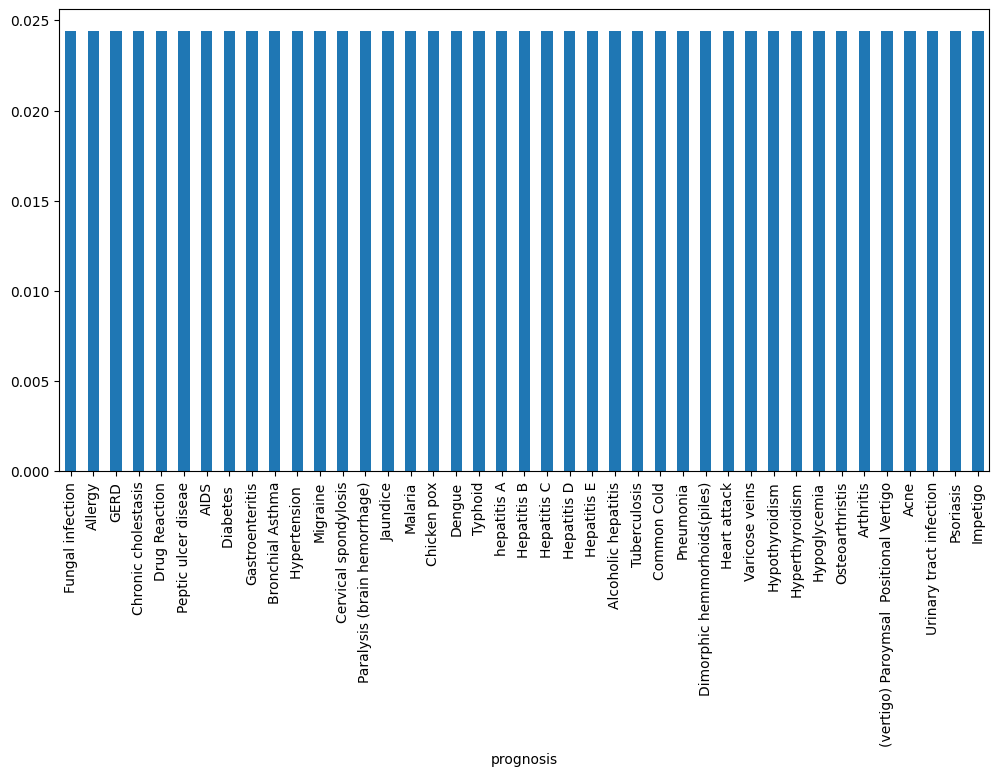

In [12]:
X_full["prognosis"].value_counts(normalize=True).plot(kind="bar", figsize=(12, 6))
plt.show()

In [13]:
X_test.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,...,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.166667,0.190476,0.023810,0.047619,0.023810,0.166667,0.142857,0.047619,0.047619,0.023810,...,0.023810,0.023810,0.023810,0.047619,0.023810,0.023810,0.023810,0.023810,0.047619,0.023810
std,0.377195,0.397437,0.154303,0.215540,0.154303,0.377195,0.354169,0.215540,0.215540,0.154303,...,0.154303,0.154303,0.154303,0.215540,0.154303,0.154303,0.154303,0.154303,0.215540,0.154303
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
X_test.shape

(42, 133)

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [16]:
# Prepare data
encoder = LabelEncoder()
X_full["prognosis"] = encoder.fit_transform(X_full["prognosis"])

X = X_full.drop("prognosis", axis=1).values
y = X_full["prognosis"].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=67, stratify=y)

In [17]:
rf = RandomForestClassifier()
params_grid = {
    "n_estimators": [100, 250, 500],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}
scoring = "f1_macro"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=99)

# Grid Search
grid_search = GridSearchCV(
    rf,
    params_grid,
    scoring=scoring,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [18]:
rf = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=2
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average="macro")

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Macro Score: {f1:.4f}")


Accuracy: 1.0000
F1-Macro Score: 1.0000


In [19]:
import seaborn as sns

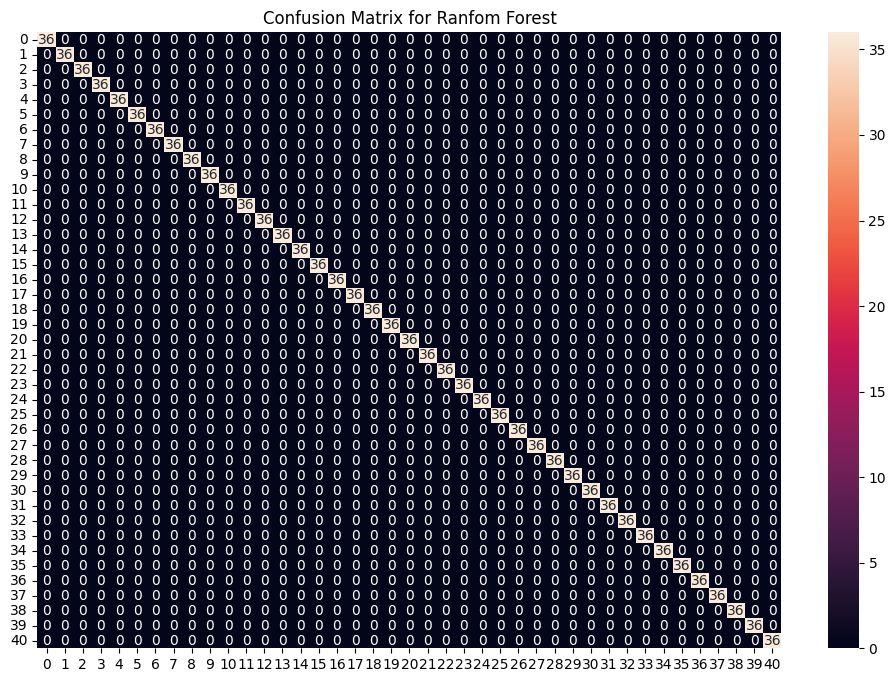

In [20]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix for Ranfom Forest")
plt.show()

In [21]:
X_test["prognosis"] = encoder.fit_transform(X_test["prognosis"])
X_test_ = X_test.drop("prognosis", axis=1).values
y_test_ = X_test["prognosis"].values

preds = rf.predict(X_test_)
accuracy = accuracy_score(y_test_, preds)
f1 = f1_score(y_test_, preds, average="macro")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Macro Score: {f1:.4f}")

Accuracy: 0.9762
F1-Macro Score: 0.9837


In [22]:
preds_labels = encoder.classes_[preds]
output = pd.DataFrame({'id': X_test.index,
                       'prognosis': preds_labels})
output.to_csv('submission.csv', index=False)

In [25]:
!pip install ipywidgets -q
!pip install deep-translator -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.6 MB/s eta 0:00:00


In [35]:
gejala_asli = X_full.columns[:-1]

In [37]:
# Terjemahkan semua gejala ke Bahasa Indonesia
translator = GoogleTranslator(source="en", target="id")
gejala_indonesia = [translator.translate(g.replace("_", " ")) for g in gejala_asli]

In [38]:
import ipywidgets as widgets

In [39]:
# Buat checkbox untuk semua gejala dalam bahasa Indonesia
checkboxes = [widgets.Checkbox(value=False, description=gejala.capitalize()) for gejala in gejala_indonesia]
symptom_box = widgets.GridBox(checkboxes, layout=widgets.Layout(grid_template_columns="repeat(3, 200px)"))
display(symptom_box)

# Tombol prediksi
button = widgets.Button(description="Prediksi Penyakit", button_style='success')
output = widgets.Output()
display(button, output)

# Fungsi saat tombol diklik
def on_button_click(b):
    selected_symptoms = [gejala_asli[i] for i, cb in enumerate(checkboxes) if cb.value]
    input_vector = [1 if g in selected_symptoms else 0 for g in gejala_asli]

    prediction = rf.predict([input_vector])[0]
    label_en = encoder.inverse_transform([prediction])[0]
    label_id = translator.translate(label_en)

    with output:
        output.clear_output()
        print("✅ Gejala yang dipilih:")
        for g in selected_symptoms:
            print("•", translator.translate(g.replace("_", " ")).capitalize())
        print("\n🤖 Hasil Prediksi Penyakit:", label_id)

button.on_click(on_button_click)

GridBox(children=(Checkbox(value=False, description='Gatal'), Checkbox(value=False, description='Ruam kulit'),…

Button(button_style='success', description='Prediksi Penyakit', style=ButtonStyle())

Output()

In [60]:
# Asumsikan X adalah DataFrame asli sebelum train-test split
gejala_list = list(X_full.columns)

In [64]:
# Buat dict: key = nama asli, value = terjemahan (pakai label kombinasi untuk tampilannya)
gejala_translate = {
    g: f"{ind} ({g})" for g, ind in zip(gejala_asli, gejala_indonesia)
}

# Simpan ke file
joblib.dump(gejala_translate, "translated_gejala.pkl")

['translated_gejala.pkl']

In [65]:
# Ambil label asli
labels_en = encoder.classes_

# Translate label ke Indonesia
translator = GoogleTranslator(source='en', target='id')
labels_id = [translator.translate(label.replace("_", " ")) for label in labels_en]

# Gabungkan ke dict dan simpan
label_translate = {en: idn.capitalize() for en, idn in zip(labels_en, labels_id)}

import joblib
joblib.dump(label_translate, "translated_label.pkl")


['translated_label.pkl']

In [63]:
import joblib

joblib.dump(rf, "model.pkl")
print('model telah disimpan')
joblib.dump(encoder, "encoder.pkl")
print('encoder telah disimpan')
joblib.dump(list(gejala_asli), "gejala.pkl")
print('list gejala telah disimpan')

model telah disimpan
encoder telah disimpan
list gejala telah disimpan
